# Sales Predictive Modeling P1: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import pandas.api.types as ptype
import matplotlib.pyplot as plt

## Business Requirements

**Problem Statement:**

Big Mart is a retail store chain that sells various products across different cities. The company is seeking to enhance its sales forecasting accuracy to optimize inventory management, marketing strategies, and operational decisions. The sales data includes information about various items, stores, and sales over a period.

### Goal:
The goal is to build a predictive model that can forecast the sales for each product at a particular store. This will help Big Mart make better stocking decisions, reduce wastage, and maximize profit margins.

### Business Implications:
Accurate sales predictions will allow Big Mart to:
1. **Optimize inventory management**: Ensuring that high-demand products are always in stock and minimizing excess inventory.
2. **Increase profit margins**: By reducing costs associated with overstocking or understocking.
3. **Improve customer satisfaction**: Ensure products are available when and where they are needed.
4. **Guide marketing and promotions**: By understanding which products are likely to perform well, the company can focus on targeted promotions.

## Data Collection

In [2]:
# collect data from bigmart sales
bigmart = pd.read_csv("bigmart_sales.csv")
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# identify sales data
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
# summary statistics
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
# summary statistics for categorical variable
bigmart.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


+ **Numberical Variables**: Item_Weight	Item_Visibility	Item_MRP	Outlet_Establishment_Year	Item_Outlet_Sales
+ **Categorical Variables**: Item_Identifier	Item_Fat_Content	Item_Type	Outlet_Identifier	Outlet_Size	Outlet_Location_Type	Outlet_Type

## Data Preprocessing

Approach for preprocessing sales data from BigMart: 

   - **Handling Missing Values:** Check for any missing values in the dataset and decide how to handle them (e.g., imputation, removal).
   - **Feature Engineering:** Create new features if needed (e.g., age of the store from the establishment year).
   - **Normalization/Standardization:** Scale features to ensure that numerical values are on a similar scale.
   - **Categorical Encoding:** Convert categorical variables into numerical formats using methods such as one-hot encoding or label encoding.

In [6]:
# identify some missing values
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# identify duplicated rows
bigmart.duplicated().sum()

0

In [8]:
# columns with the missing values
columns_with_missval = ["Item_Weight", "Outlet_Size"]
bigmart_missval = bigmart[columns_with_missval]
bigmart_missval.head()

,Item_Weight,Outlet_Size
0,9.30,Medium
1,5.92,Medium
2,17.50,Medium
3,19.20,NaN
4,8.93,High


+ **Item Weight**: replacing missing value by taking the mean value of the feature
+ **Outlet Size**: replacing the Outlet size by unknown size

In [9]:
# remove missing values from item weight
item_weight_mean = bigmart["Item_Weight"].mean()
bigmart["Item_Weight"] = bigmart["Item_Weight"].fillna(0)
bigmart["Item_Weight"] = bigmart["Item_Weight"].replace(0, item_weight_mean)

# remove missing values from outlet size
bigmart["Outlet_Size"] = bigmart["Outlet_Size"].fillna("Unknown size")

In [10]:
# check nullvalues
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
print(ptype.is_object_dtype(bigmart["Outlet_Size"]))

True


In [12]:
# store only categorical properties of items
def seperate_features(sales_data): 
  item_cat_properties = []
  item_num_properties = []
  for column in sales_data.columns: 
    if ptype.is_object_dtype(sales_data[column]): 
      item_cat_properties.append(column)
    else:
      item_num_properties.append(column)

  return item_cat_properties, item_num_properties

item_qualities = seperate_features(bigmart)[0]
bigmart[item_qualities].head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Unknown size,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [13]:
# check whitespaces in categorical and string data
wspace_rx = r'^\s+|\s+$'
columns_with_wspace = []

for column in item_qualities: 
  whitespace_left = bigmart[bigmart[column].str.startswith(" ")].sum()
  whitespace_right = bigmart[bigmart[column].str.endswith(" ")].sum()

  if (whitespace_right.sum() > 0) and (whitespace_left.sum() > 0):
    columns_with_wspace.append(column)
  else:
    print(f"{column}: No white spaces are found")

Item_Identifier: No white spaces are found
Item_Fat_Content: No white spaces are found
Item_Type: No white spaces are found
Outlet_Identifier: No white spaces are found
Outlet_Size: No white spaces are found
Outlet_Location_Type: No white spaces are found
Outlet_Type: No white spaces are found


## Feature Engineering

+ Feature Transformation
+ Feature Generation
+ Feature Selection
+ Feature Encoding

In [14]:
bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Feature Generation

**Feature Generation**: Creating new features for training the model's performance
+ **Item_Age**: current_year - Outlet_Establishment_Year
+ **Item_Fat_Content_Binary**: Convert categorical to binary (if not done above).
+ **Visibility_Per_MRP**: Item_Visibility / Item_MRP to see the ratio of visibility to price.

In [15]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown size,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
# Feature Generation: creating new features
bigmart["Item_Age"] = 2024 - bigmart["Outlet_Establishment_Year"]
bigmart["Visibility_p_MRP"] = bigmart["Item_Visibility"]/bigmart["Item_MRP"]

**Feature Transformation**

In [17]:
# Feature Transformation: extract item identifier category and convert into numeric labels
bigmart_prop = bigmart[item_qualities]
bigmart_prop["Item_Identifier_Categories"] = bigmart_prop["Item_Identifier"].str.extract(r"([A-Z]{2})")
bigmart["Item_Identifier_Categories"] = bigmart_prop["Item_Identifier"].str.extract(r"([A-Z]{2})")

C:\Users\mian_\AppData\Local\Temp\ipykernel_27504\2645517108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bigmart_prop["Item_Identifier_Categories"] = bigmart_prop["Item_Identifier"].str.extract(r"([A-Z]{2})")


### Feature Encoding

In [18]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Age,Visibility_p_MRP,Item_Identifier_Categories
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,0.000064,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,0.000399,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,0.000118,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown size,Tier 3,Grocery Store,732.3800,26,0.000000,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,0.000000,NC


In [19]:
bigmart_prop.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier_Categories
count,8523,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4,3
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,FD
freq,10,5089,1232,935,2793,3350,5577,6125


In [20]:
bigmart["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Categorical features that needed to be encoded are: 
+ Item Identifier Categories
+ Item_Type
+ Outlier_Identifier
+ Outlet_Size
+ Outlet_Location_Type
+ Outlet_Type

The properties of items that have more than 10 categories are not being considered to encode its categories. One that has 16 categories, is the type of each item(labeled as Item Type). The other one with 10 categories, named as Outlet Identifier. The Outlet Identifier is a data starting from the prefix OUT followed by 3 digits which will not be used as an input feature for testing the model's performance. 


Item Identifier Categories
+ FD: Food
+ NC: Non Consumable
+ DR: Drinks

In [21]:
cat = bigmart_prop['Item_Identifier'].str.extract(r"([A-Z]{2})")
cat.value_counts()
# bigmart_prop['Item_Identifier'].str.extract(r"(\d+)")

0 
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

### Feature Encoding

**Feature Encoding:**

features that needed to encode to enhance dataset: 
+ outlet size
+ item fat content
+ outlet type
+ item identifier categories

In [22]:
# import sklearn label encoder class
from sklearn.preprocessing import LabelEncoder

# create a labelencoder object --> encode features
labelencoder = LabelEncoder()

# encode 4 categorical features: outlet size, item fat content, outlet type and item identifier categories
bigmart.loc[:,"Outlet_Size_Encoded"] = labelencoder.fit_transform(bigmart["Outlet_Size"])
bigmart.loc[:, "Outlet_Type_Encoded"] = labelencoder.fit_transform(bigmart["Outlet_Size"])
bigmart.loc[:, "Item_Fat_Content_Encoded"] = labelencoder.fit_transform(bigmart["Item_Fat_Content"])
bigmart.loc[:, "Item_Identifier_Cat_Enc"] = labelencoder.fit_transform(bigmart["Item_Identifier_Categories"])
bigmart.loc[:, "Outlet_Location_Type_Enc"] = labelencoder.fit_transform(bigmart["Outlet_Location_Type"])

In [23]:
bigmart["Outlet_Size"].value_counts()
bigmart["Outlet_Size_Encoded"].value_counts()

Outlet_Size_Encoded
1    2793
3    2410
2    2388
0     932
Name: count, dtype: int64

In [24]:
bigmart[["Outlet_Size","Outlet_Size_Encoded", 
         "Item_Fat_Content","Item_Fat_Content_Encoded", 
         "Outlet_Type", "Outlet_Type_Encoded",
         "Item_Identifier_Categories", "Item_Identifier_Cat_Enc"]].value_counts()

Outlet_Size   Outlet_Size_Encoded  Item_Fat_Content  Item_Fat_Content_Encoded  Outlet_Type        Outlet_Type_Encoded  Item_Identifier_Categories  Item_Identifier_Cat_Enc
Unknown size  3                    Low Fat           1                         Supermarket Type1  3                    FD                          1                          650
Small         2                    Low Fat           1                         Supermarket Type1  2                    FD                          1                          643
                                   Regular           2                         Supermarket Type1  2                    FD                          1                          621
Unknown size  3                    Regular           2                         Supermarket Type1  3                    FD                          1                          609
Medium        1                    Low Fat           1                         Supermarket Type3  1                  

In [25]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Age,Visibility_p_MRP,Item_Identifier_Categories,Outlet_Size_Encoded,Outlet_Type_Encoded,Item_Fat_Content_Encoded,Item_Identifier_Cat_Enc,Outlet_Location_Type_Enc
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,25,0.000064,FD,1,1,1,1,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,15,0.000399,DR,1,1,2,0,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,25,0.000118,FD,1,1,1,1,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown size,Tier 3,Grocery Store,732.3800,26,0.000000,FD,3,3,2,1,2
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,37,0.000000,NC,0,0,1,2,2


### Feature Scaling

Features that needed to be scaled: 
+ Item_Weight
+ Item_Visibility
+ Item_MRP

AttributeError: 'str' object has no attribute 'values'

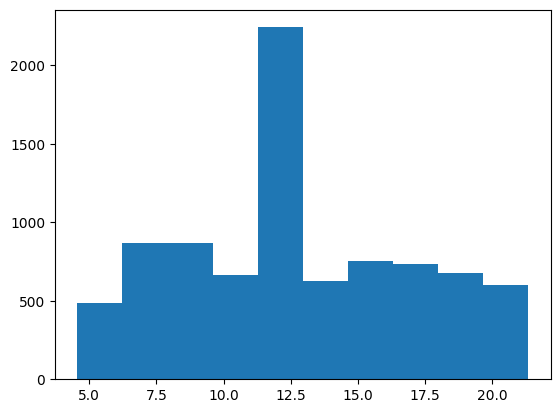

In [26]:
# plot the features in scatterplot
hist1 = plt.hist(bigmart["Item_Weight"].values, bins=10)
hist2 = plt.hist(bigmart["Item_Visibility".values])

In [ ]:
# import standard scaler class from scikit learn
from sklearn.preprocessing import StandardScaler

# scale the features item wegith item visibility and item mrp
scaler = StandardScaler()

bigmart["Item_Weight"] = scaler.fit_transform(bigmart["Item_Weight"])
bigmart["Item_Visibility"] = scaler.fit